In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [9]:
data = pd.read_csv('drag_curves.csv')

data.fillna(0.0)

,v1,d1,v2,d2,v3,y3,v4,d4,v5,d5
0,4907.17755,51.94263,4960.06476,32.74674,3849.43335,32.95204,793.30815,21.96830,7313.54560,0.51406
1,4884.51160,51.73733,4986.50836,32.74674,3875.87696,32.95204,819.75175,21.96830,7287.10200,0.61671
2,4858.06800,51.89131,5012.95197,32.74674,3902.32056,32.84939,846.19536,21.96830,7260.65839,0.97599
3,4831.62439,51.89131,5039.39557,32.74674,3928.76417,32.74674,872.63896,21.96830,7234.21479,1.12997
4,4805.18079,51.89131,5065.83918,32.74674,3955.20777,32.74674,899.08257,22.07095,7207.77118,1.38660
...,...,...,...,...,...,...,...,...,...,...
278,7438.20831,11.80576,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
279,7464.65192,11.65179,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280,7491.09552,11.54913,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
281,7517.53913,11.44648,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


[4907.17755 4884.5116  4858.068   4831.62439 4805.18079 4778.73718
 4752.29358 4725.84997 4699.40637 4672.96276 4646.51916 4620.07555
 4593.63195 4567.18834 4540.74474 4514.30113 4487.85753 4461.41392
 4434.97032 4408.52671 4382.08311 4355.6395  4329.1959  4302.75229
 4276.30869 4249.86508 4223.42148 4196.97787 4170.53427 4144.09066
 4117.64706 4091.20345 4064.75985 4038.31624 4011.87264 3985.42903
 3958.98543 3932.54182 3906.09822 3879.65461 3853.21101 3826.7674
 3800.3238  3773.88019 3747.43659 3720.99298 3694.54938 3668.10577
 3641.66217 3615.21856 3588.77496 3562.33135 3535.88775 3509.44414
 3483.00054 3456.55693 3430.11333 3403.66972 3377.22612 3350.78251
 3324.33891 3297.8953  3271.4517  3245.00809 3218.56449 3192.12089
 3165.67728 3139.23368 3112.79007 3086.34647 3059.90286 3033.45926
 3007.01565 2980.57205 2954.12844 2927.68484 2901.24123 2874.79763
 2848.35402 2821.91042 2795.46681 2769.02321 2742.5796  2716.136
 2689.69239 2663.24879 2636.80518 2610.36158 2583.91797 2557.4743

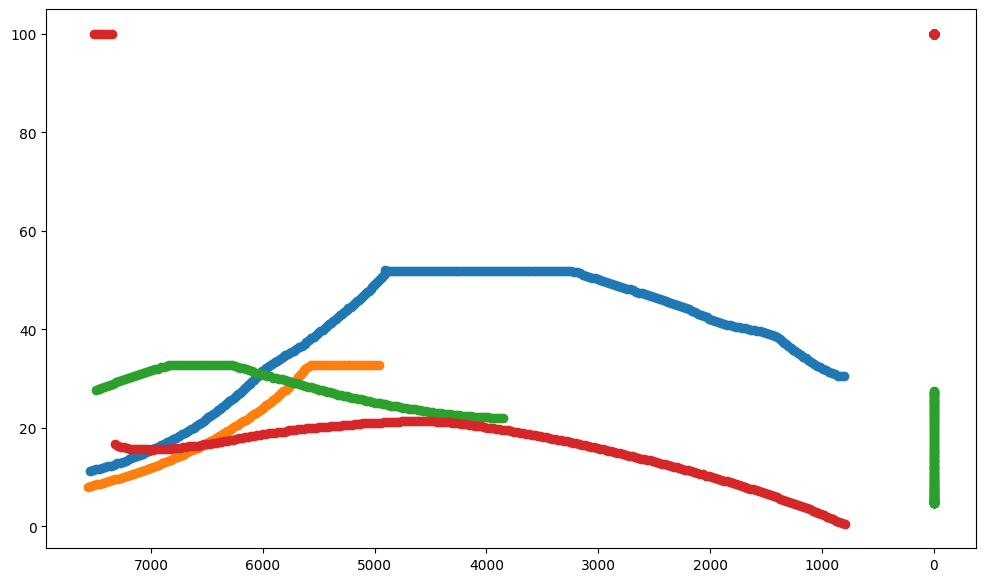

In [10]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax

plt_.invert_xaxis()

for v_col, d_col in zip(v_columns, d_columns):

    v_array = np.nan_to_num(data[v_col].to_numpy(), nan = 0)
    d_array = np.nan_to_num(data[d_col].to_numpy(), nan = 100)
    
    print(v_array, d_array)

    plt1 = plt_.scatter(v_array, d_array)
    
#img = plt.imread("drag.png")
#plt_.imshow(img, aspect='auto', extent=[7620, 0, 0, 60], alpha=1, cmap='Greys_r')

In [11]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

def traj_disp_new(n, data):
    if n==1:
        
        r_speed = (5500, 7800)


    elif n==2:
        r_speed = (4330, 5500)

    elif n==3:
        r_speed = (3400, 4330)

    elif n==4:
        r_speed = (1950, 3400)

    elif n==5:
        r_speed = (300, 1950)
        

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("traj" + str(n) + ".png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])


    
    
    for v_col, d_col in zip(v_columns, d_columns):
        
        disp_data = data[(data[v_col].between(*r_speed))][[v_col, d_col]]
        
        v_array = disp_data[v_col].to_numpy()
        d_array = disp_data[d_col].to_numpy()

        traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(v_array, d_array)])
        traj_y = np.array([traj_y_convert_new(n, v) for v in v_array])
        
        plt1 = plt_.scatter(traj_x, traj_y, s=10)


    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1221.8492768869419 + 0.06539042505511539 * vel**1 * drag**0 + -211.8206040700076 * vel**0 * drag**1 + -3.665448458782899e-05 * vel**2 * drag**0 + 0.023576901393660615 * vel**1 * drag**1 + 6.12823555795536 * vel**0 * drag**2 + 2.833349485587e-09 * vel**3 * drag**0 + -9.179574484665027e-07 * vel**2 * drag**1 + -0.00026682724201671166 * vel**1 * drag**2 + -0.06810957054774618 * vel**0 * drag**3
    elif n==2:
        return -38.0268152009462 + 0.09906578419425373 * vel**1 * drag**0 + -12.707084859116666 * vel**0 * drag**1 + 1.3305326295037778e-06 * vel**2 * drag**0 + 0.0011766877774739082 * vel**1 * drag**1 + -0.014838331795402771 * vel**0 * drag**2
    elif n==3:
        return -531.1596833649385 + 0.2369508010818678 * vel**1 * drag**0 + -0.7771572651359938 * vel**0 * drag**1 + -2.1586890749936138e-07 * vel**2 * drag**0 + 0.00021100580946806138 * vel**1 * drag**1 + -0.1132059499998106 * vel**0 * drag**2
    elif n==4:
        return -748.4063596835092 + 0.7408869827508833 * vel**1 * drag**0 + -13.833348494044804 * vel**0 * drag**1 + -8.626522934807035e-05 * vel**2 * drag**0 + 2.9372518671475292e-05 * vel**1 * drag**1 + 0.10761028181794845 * vel**0 * drag**2
    elif n==5:
        return -776.3651212085673 + 1.0608120994108508 * vel**1 * drag**0 + -0.0012408627622487007 * vel**0 * drag**1 + -0.000190689080882267 * vel**2 * drag**0 + -0.0018267317853930109 * vel**1 * drag**1 + -0.062043138111733405 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (-0.1187007912 * vel + 966.857 + 32.7)
    elif n==2:
        out = (-0.23731299972 * vel + 1342.6666 + 32.7)
    elif n==3:
        out = (-0.255413394 * vel + 1170 + 32.7)
    elif n==4:
        out = (-0.171587932 * vel + 639 + 32.7)
    elif n==5:
        out = (-0.2568241552 * vel + 565.714 + 32.7)

    return  50 - (out - 350)
    
#traj_bounds= [[0, 500], [50, 350]]

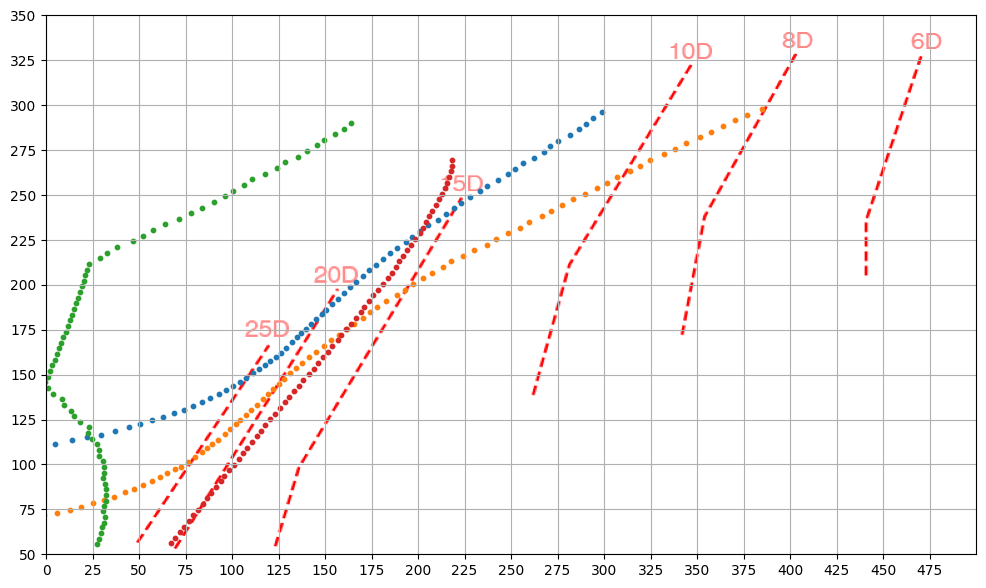

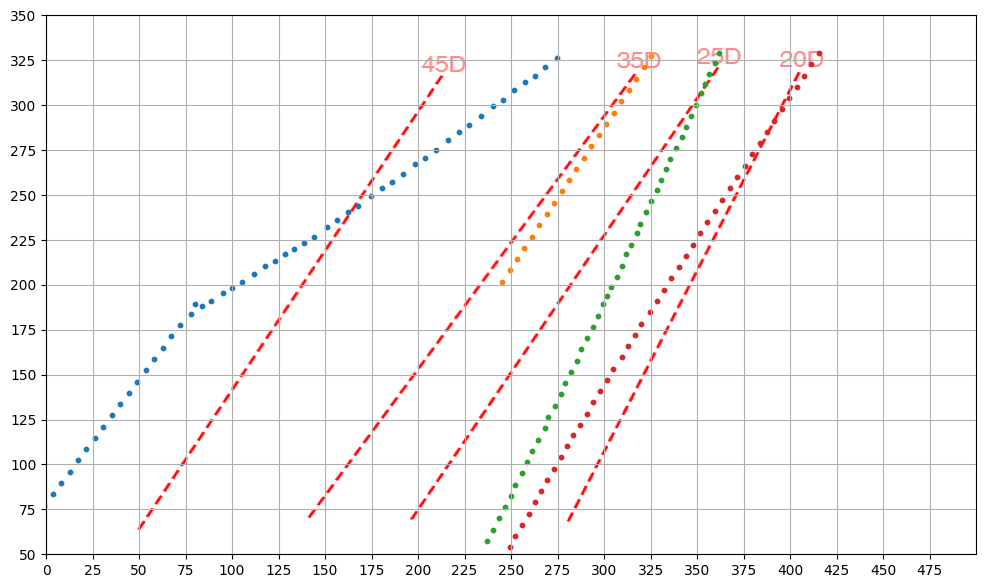

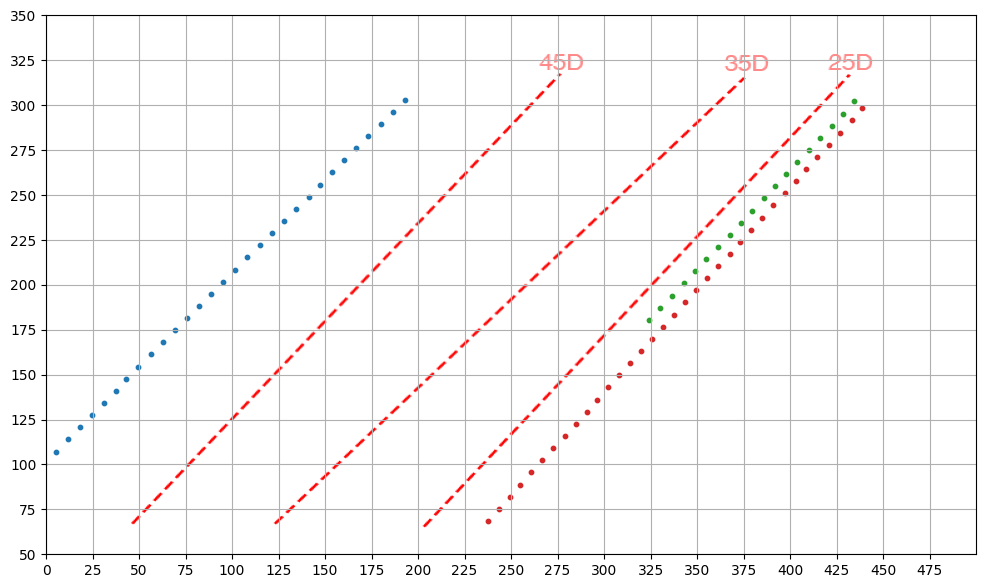

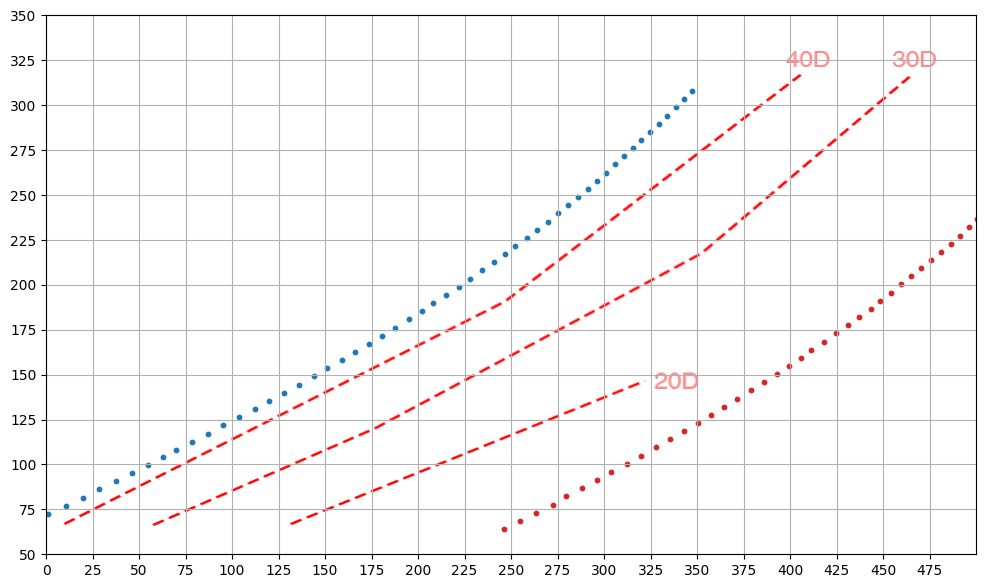

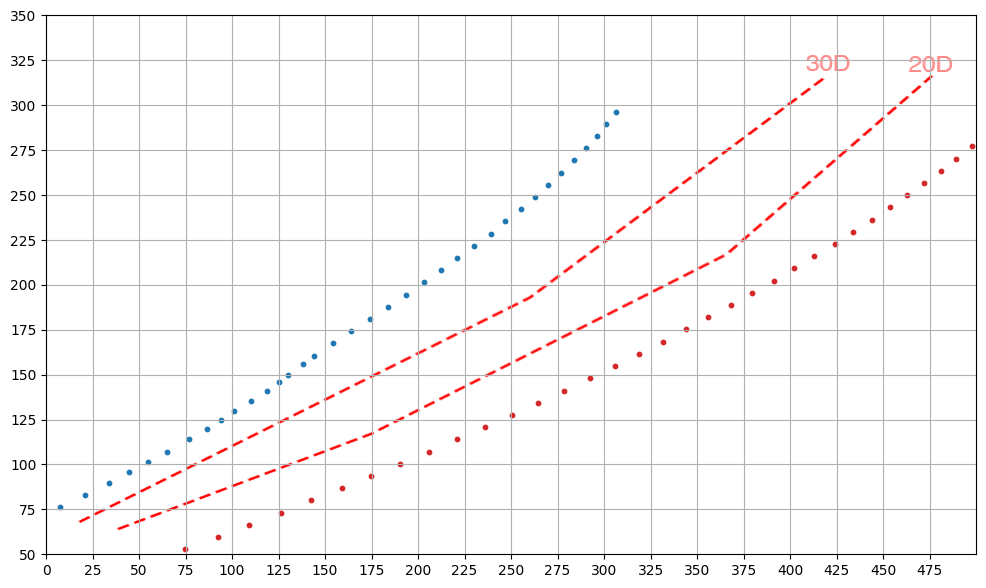

In [12]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)